<a href="https://colab.research.google.com/github/samirgadkari/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module3-dimensionality-reduction/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

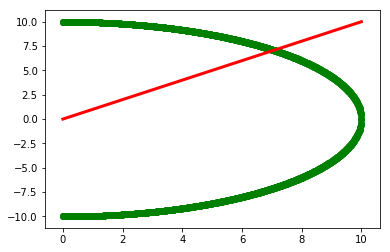

In [2]:
xs = ys = np.linspace(0, 10, 1000)
plt.plot(xs, ys, color = 'red', linewidth = 3)
circle = []
c = 10
for x in xs:
  y = math.sqrt(c * c - x * x)
  circle.append((x, y))
  circle.append((x, -y))
xs, ys = zip(*circle)

plt.scatter(xs, ys, color = 'green', linewidth = 1)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function is one that has a single output for a single input value.  Graphs that don't pass the vertical line test have more than one output for a single input value.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only Relation 2 is a function.  All other relations have more than one y value for a single x value.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

For m:

  - Dimensionality of input = 3
  - Dimensionality of output = 3

For n:

  - Dimensionality of input = 4
  - Dimensionality of output = 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

It's possible to create such a function. ex:

f(x, y) = (x, 2y, x + y)

This function maps 2-D (x and y) to 3-D (since it returns a tuple of 3 values)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [3]:
unit_2d = np.array([[1, 0], [0, 1]])
unit_3d = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

p = np.matmul(np.array([[1, 3], [-1, 2]]), unit_2d)
print('p:\n', p)
q = np.matmul(np.array([[4, 1, 2], [-1, 2, 3], [5, 1, -2]]), unit_3d)
print('q:\n', q)

p:
 [[ 1  3]
 [-1  2]]
q:
 [[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [40]:
verify_matrix = np.array([1, 2]) # x1 = 1, x2 = 2
manual_output_1 = 1 + 3 * 2
manual_output_2 = -1 + 2 * 2
print('2-D manual:', manual_output_1, manual_output_2)

auto_values = np.matmul(p, verify_matrix)
print('2-D auto:', auto_values)

verify_matrix = np.array([1, 2, 3]) # x1 = 1, x2 = 2, x3 = 3
manual_output_1 = 4 * 1 + 2 + 2 * 3
manual_output_2 = -1 + 2 * 2 + 3 * 3
manual_output_3 = 5 * 1 + 2 - 2 * 3
print('3-D manual:', manual_output_1, manual_output_2, manual_output_3)

auto_values = np.matmul(q, verify_matrix)
print('3-D auto:', auto_values)

2-D manual: 7 3
2-D auto: [7 3]
3-D manual: 12 12 1
3-D auto: [12 12  1]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are the vectors that retain their orientation through a transformation.  Although they may retain their orientation, their scale may change.  This change of scale is the eigenvectors' eigenvalue.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Challenges of working with high-dimensional spaces are:
  - Difficult to plot and visualize data in more than 3 dimensions.  Even in 3 dimensions, it's not easy to see - you have to provide animations.
  - More features = more dimensions.  You may have diminishing returns from additional features.
  - Due to the larger data set, the number of computations you have to do increases.  This increases your computation time.  Since data science work is iterative, if you have to wait for the computation to finish, it slows you down.
  - If you're working with data in say 3 dimensions, and you add more features thus increasing your dimensions, the distance between points increases a lot.  If you keep adding features, the distance between two points becomes similar to the distance between any two points.  Then you have equally-spaced points, and it's difficult to cluster them.
  - If your number of features > number of observations, you're at an extreme risk of overfitting.  This means your mean squared error will be very small for training data, but it will increase a lot for test data.  You really want to decrease the error for test data - not training data.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

Rule of thumb is:

Number of Observations >= 5 * Number of features

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [20]:
import pandas as pd
from sklearn.decomposition import PCA

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
df_part = df.iloc[:, 0:4]
df_part.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
pca = PCA(2)
pca.fit(df_part)
print('Eigenvectors:\n', pca.components_)
print('Eigenvalues:\n', pca.explained_variance_)
df_out = pd.DataFrame(pca.transform(df_part))
df_out['species'] = df['species']
df_out.head(5)

Eigenvectors:
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
Eigenvalues:
 [4.22484077 0.24224357]


,0,1,species
0,-2.684207,0.326607,setosa
1,-2.715391,-0.169557,setosa
2,-2.889820,-0.137346,setosa
3,-2.746437,-0.311124,setosa
4,-2.728593,0.333925,setosa


In [9]:
!pip install -U seaborn
import seaborn as sns
print(sns.__version__)

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


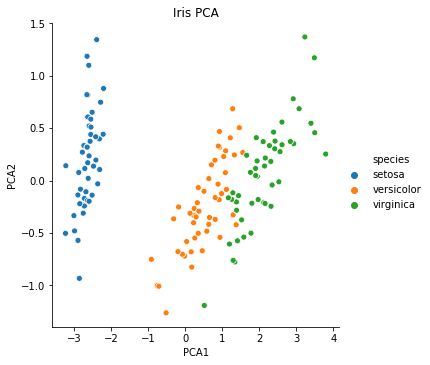

In [36]:
%matplotlib inline

plt.figure(figsize = (15, 10));
g = sns.relplot(x = 0, y = 1, hue = 'species', data = df_out, kind = 'scatter');
g.set_axis_labels('PCA1', 'PCA2');
# g.set_titles('Iris PCA');
plt.title('Iris PCA');

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)